<a href="https://colab.research.google.com/github/juliaovv/Project-ML/blob/main/zad2_wersj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
wine=pd.read_csv("winequality-red.csv",  sep=";")
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   object 
 3   residual sugar        1599 non-null   object 
 4   chlorides             1599 non-null   object 
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1595 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 150.0+ KB
None


In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine = wine.drop_duplicates()

In [5]:
columnstochange = ['citric acid','residual sugar','chlorides']

In [6]:
wine.shape

(1363, 12)

In [7]:
for x in columnstochange:
  wine[x] = wine[x].str.replace('_','')

<ipython-input-7-fda198ddfd04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine[x] = wine[x].str.replace('_','')


In [8]:
for column in columnstochange:
  wine[column] = pd.to_numeric(wine[column], errors='coerce')

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1363 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1363 non-null   float64
 1   volatile acidity      1363 non-null   float64
 2   citric acid           1363 non-null   float64
 3   residual sugar        1363 non-null   float64
 4   chlorides             1363 non-null   float64
 5   free sulfur dioxide   1363 non-null   float64
 6   total sulfur dioxide  1363 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1363 non-null   float64
 9   sulphates             1363 non-null   float64
 10  alcohol               1363 non-null   float64
 11  quality               1363 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.4 KB


In [10]:
#zamiana wartości ujemnych na ich przeciwności
def replace_negative_with_opposite(x):
  if isinstance(x, str):
        x = int(x)
  if x < 0:
        return -x
  else:
        return x
for column in wine.columns:
  wine = wine.applymap(replace_negative_with_opposite)

#uzupełnienie braków danych numerycznych średnią
mean_values = wine.mean()
wine.fillna(mean_values, inplace=True)

In [11]:
wine.head(1596)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
#Usunięcie zmiennych odstających
for y in wine.columns:
  Q1 = wine[y].quantile(0.25)
  Q3 = wine[y].quantile(0.75)
  IQR = Q3 - Q1
  wine = wine.drop(wine.loc[wine[y] > (Q3 + 1.5 * IQR)].index)
  wine = wine.drop(wine.loc[wine[y] < (Q1 - 1.5 * IQR)].index)

In [13]:
from sklearn.preprocessing import MinMaxScaler

#zmiana na rozkład normalny
scaler = MinMaxScaler()


for i in wine.columns:
    wine[i] = scaler.fit_transform(wine[[i]].values.reshape(-1, 1))

wine.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.319444,0.651685,0.000000,0.285714,0.457831,0.256410,0.259259,0.6750,0.757143,0.377049,0.148936,0.333333
1,0.375000,0.853933,0.000000,0.571429,0.722892,0.615385,0.564815,0.5500,0.314286,0.573770,0.234043,0.333333
2,0.375000,0.719101,0.054795,0.448980,0.650602,0.358974,0.444444,0.5750,0.400000,0.524590,0.234043,0.333333
3,0.847222,0.179775,0.767123,0.285714,0.445783,0.410256,0.500000,0.7000,0.257143,0.409836,0.234043,0.666667
5,0.319444,0.606742,0.000000,0.244898,0.445783,0.307692,0.314815,0.6750,0.757143,0.377049,0.148936,0.333333
6,0.388889,0.539326,0.082192,0.163265,0.373494,0.358974,0.490741,0.5000,0.457143,0.213115,0.148936,0.333333
7,0.305556,0.595506,0.000000,0.000000,0.325301,0.358974,0.138889,0.2750,0.585714,0.229508,0.276596,1.000000
8,0.375000,0.516854,0.027397,0.326531,0.421687,0.205128,0.111111,0.5500,0.542857,0.393443,0.170213,1.000000
10,0.222222,0.516854,0.109589,0.244898,0.710843,0.358974,0.546296,0.4375,0.428571,0.344262,0.106383,0.333333
12,0.069444,0.556180,0.000000,0.163265,0.614458,0.384615,0.490741,0.2375,0.857143,0.311475,0.255319,0.333333


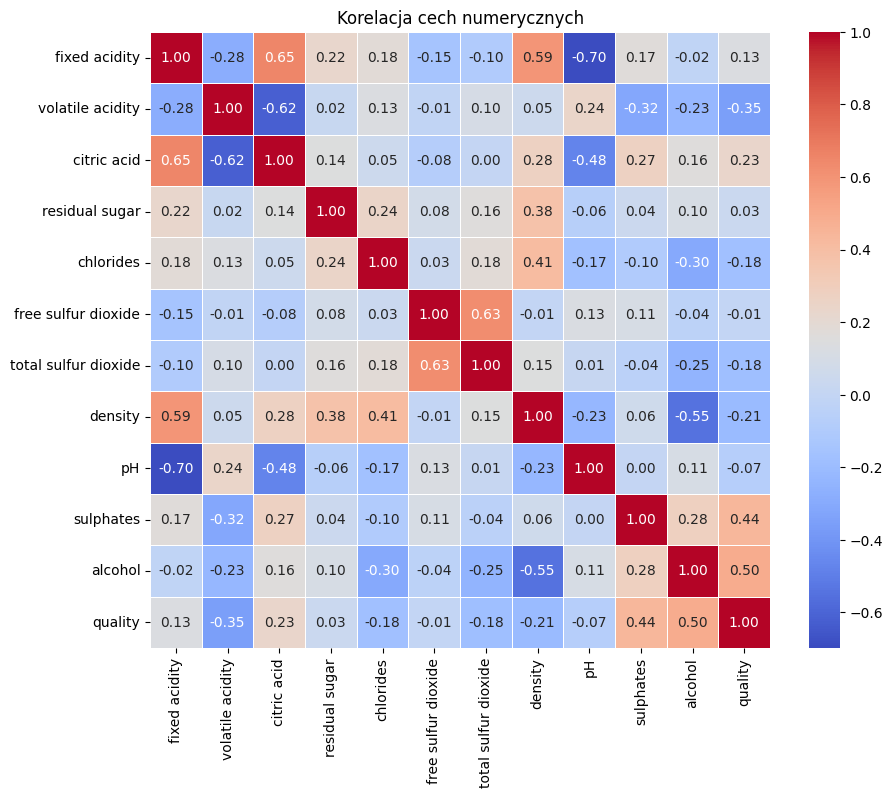

In [14]:
#wygenerowanie heatmapy korelacji cech numerycznych
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(), annot = True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Korelacja cech numerycznych')
plt.show()

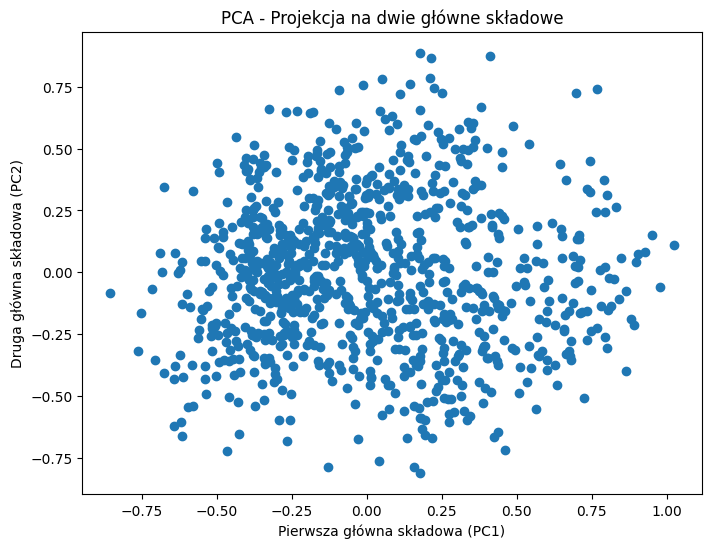

In [15]:
from sklearn.decomposition import PCA

#wybranie kolumn numerycznych (z wyłączeniem celu)
features = wine.drop(columns=['quality'])

#wykonanie PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Pierwsza główna składowa (PC1)')
plt.ylabel('Druga główna składowa (PC2)')
plt.title('PCA - Projekcja na dwie główne składowe')
plt.show()

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#podział danych

#train_wine, test_wine = train_test_split(wine ,test_size=0.3, random_state=42)
#X_train = train_wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates", "alcohol"]]
#Y_train = train_wine["quality"]
#X_test = test_wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates", "alcohol"]]
#Y_test = test_wine["quality"]

X = wine.drop(columns='quality')
Y = wine['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [17]:
#MODEL PODSTAWOWY - regresja liniowa

model=LinearRegression().fit(X_train,Y_train)
model.score(X_train,Y_train)
print("Coef: ",model.coef_)
print("Intercept: ",model.intercept_)
Y_pred = model.predict(X_test)

Coef:  [ 0.20265337 -0.22537176 -0.08314016 -0.01566463  0.03534862 -0.00414566
 -0.01572783 -0.17255677 -0.05574449  0.39491151  0.40141537]
Intercept:  0.362935379841688


In [18]:
#Średni błąd bezwzględny
from sklearn.metrics import mean_absolute_error
print("Średni błąd bezwzględny: ",mean_absolute_error(Y_test,Y_pred))

Średni błąd bezwzględny:  0.16099315033010184


In [19]:
#Mediana błędu bezwzględnego:
from sklearn.metrics import median_absolute_error
print("Mediana błędu bezwzględnego: ",median_absolute_error(Y_test,Y_pred))

Mediana błędu bezwzględnego:  0.13107126401626762


In [20]:
#R kwadrat
from sklearn.metrics import r2_score
print("R kwadrat: ",r2_score(Y_test,Y_pred))

#wniosek: słabe dopasowanie

R kwadrat:  0.3331863460525051


In [21]:
#Średni błąd kwadratowy
from sklearn.metrics import mean_squared_error
print("Średni błąd kwadratowy: ",mean_squared_error(Y_test, Y_pred))

Średni błąd kwadratowy:  0.03926184640840372


In [22]:
#Błąd średniokwadratowy
print("Błąd średniokwadratowy:", np.sqrt(mean_squared_error(Y_test, Y_pred)))

Błąd średniokwadratowy: 0.19814602294369604


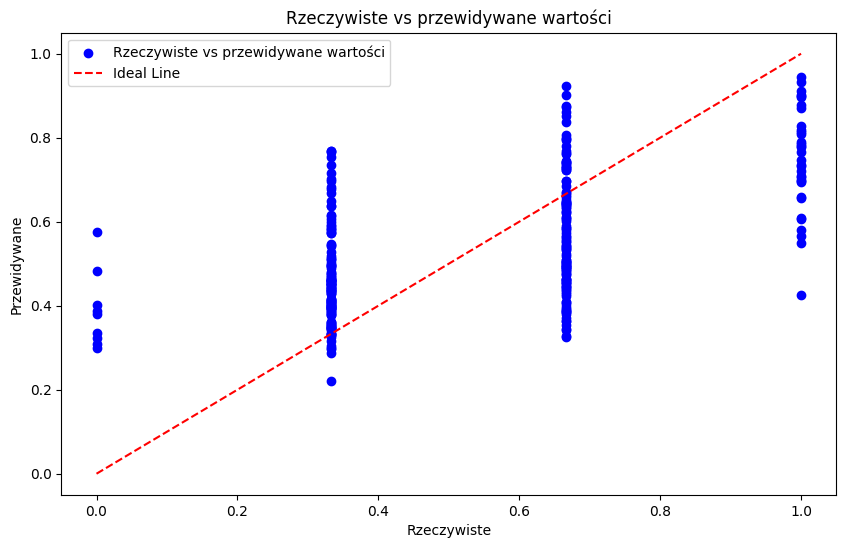

In [23]:
import matplotlib.pyplot as plt

#wykres rzeczywiste vs przewidywane wartości
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Rzeczywiste vs przewidywane wartości')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Rzeczywiste vs przewidywane wartości')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()
#wniosek: słabe dopasowanie modelu

In [24]:
#cross validation
from sklearn.model_selection import RepeatedKFold, cross_val_score

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(model, X, Y, cv=rkf,scoring='neg_mean_absolute_error')
print(cv_scores)

[-0.15687835 -0.16090959 -0.1507755  -0.14795921 -0.16148023 -0.1491355
 -0.1623042  -0.15348525 -0.15623667 -0.15495273 -0.14432358 -0.16309528
 -0.14466825 -0.16176226 -0.16663021]
